In [1]:
#import numpy , pandas , scipy , matplotlib , seaborn , sklearn
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats, integrate
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

plt.rc("font", size=14)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
# load DataSet
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.info()
churn_df.head()
list(churn_df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [3]:
# check unique value
churn_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [4]:
id_col     = ['customerID']
target_col = ['Churn']
category_cols = [col for col in churn_df.columns if churn_df[col].nunique() <= 4 and col != 'Churn']
numeric_cols = [col for col in churn_df.columns if col not in category_cols and col != 'Churn' and col != 'customerID']
print(category_cols)
print(numeric_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


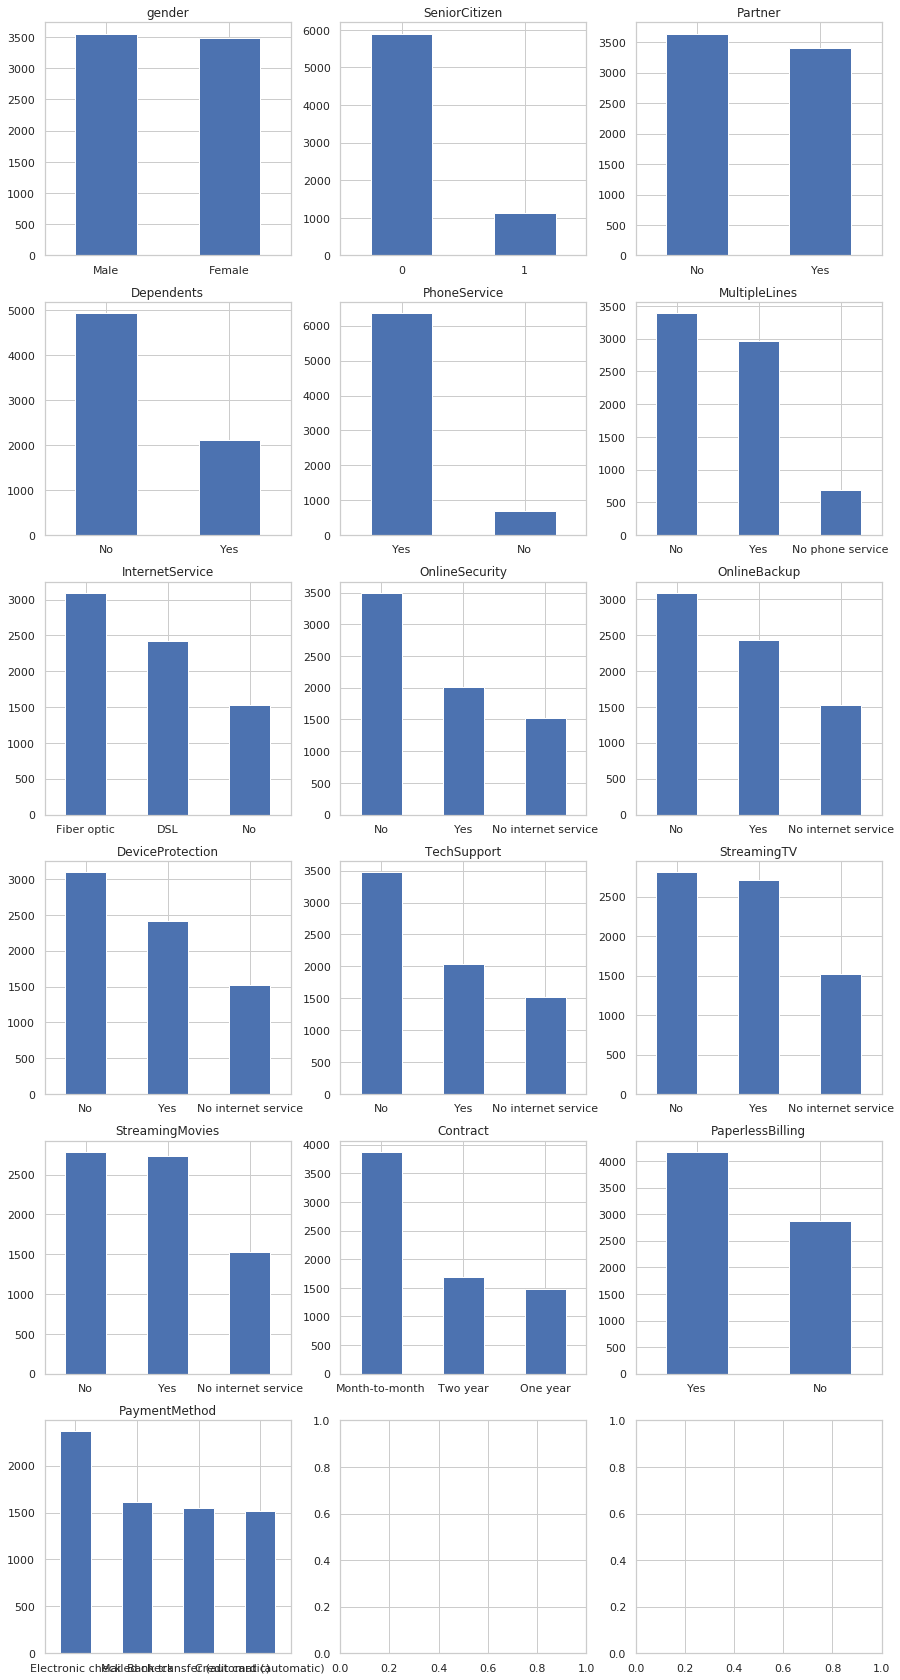

In [5]:
#visualize categorical data
fig , axes = plt.subplots(nrows = 6 ,ncols = 3,figsize = (15,30))
for i, item in enumerate(category_cols):
    if i < 3:
        ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[0,i],rot = 0)
    elif i >=3 and i < 6:
        ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[1,i-3],rot = 0)
    elif i >= 6 and i < 9:
        ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[2,i-6],rot = 0)
    elif i < 12:
        ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[3,i-9],rot = 0)
    elif i < 15:
        ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[4,i-12],rot = 0)
    elif i < 18:
        ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[5,i-15],rot = 0)
    ax.set_title(item)

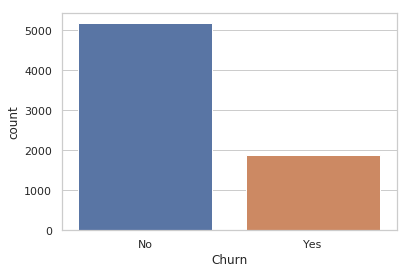

In [6]:
sns.countplot(x= 'Churn'   , data=churn_df);

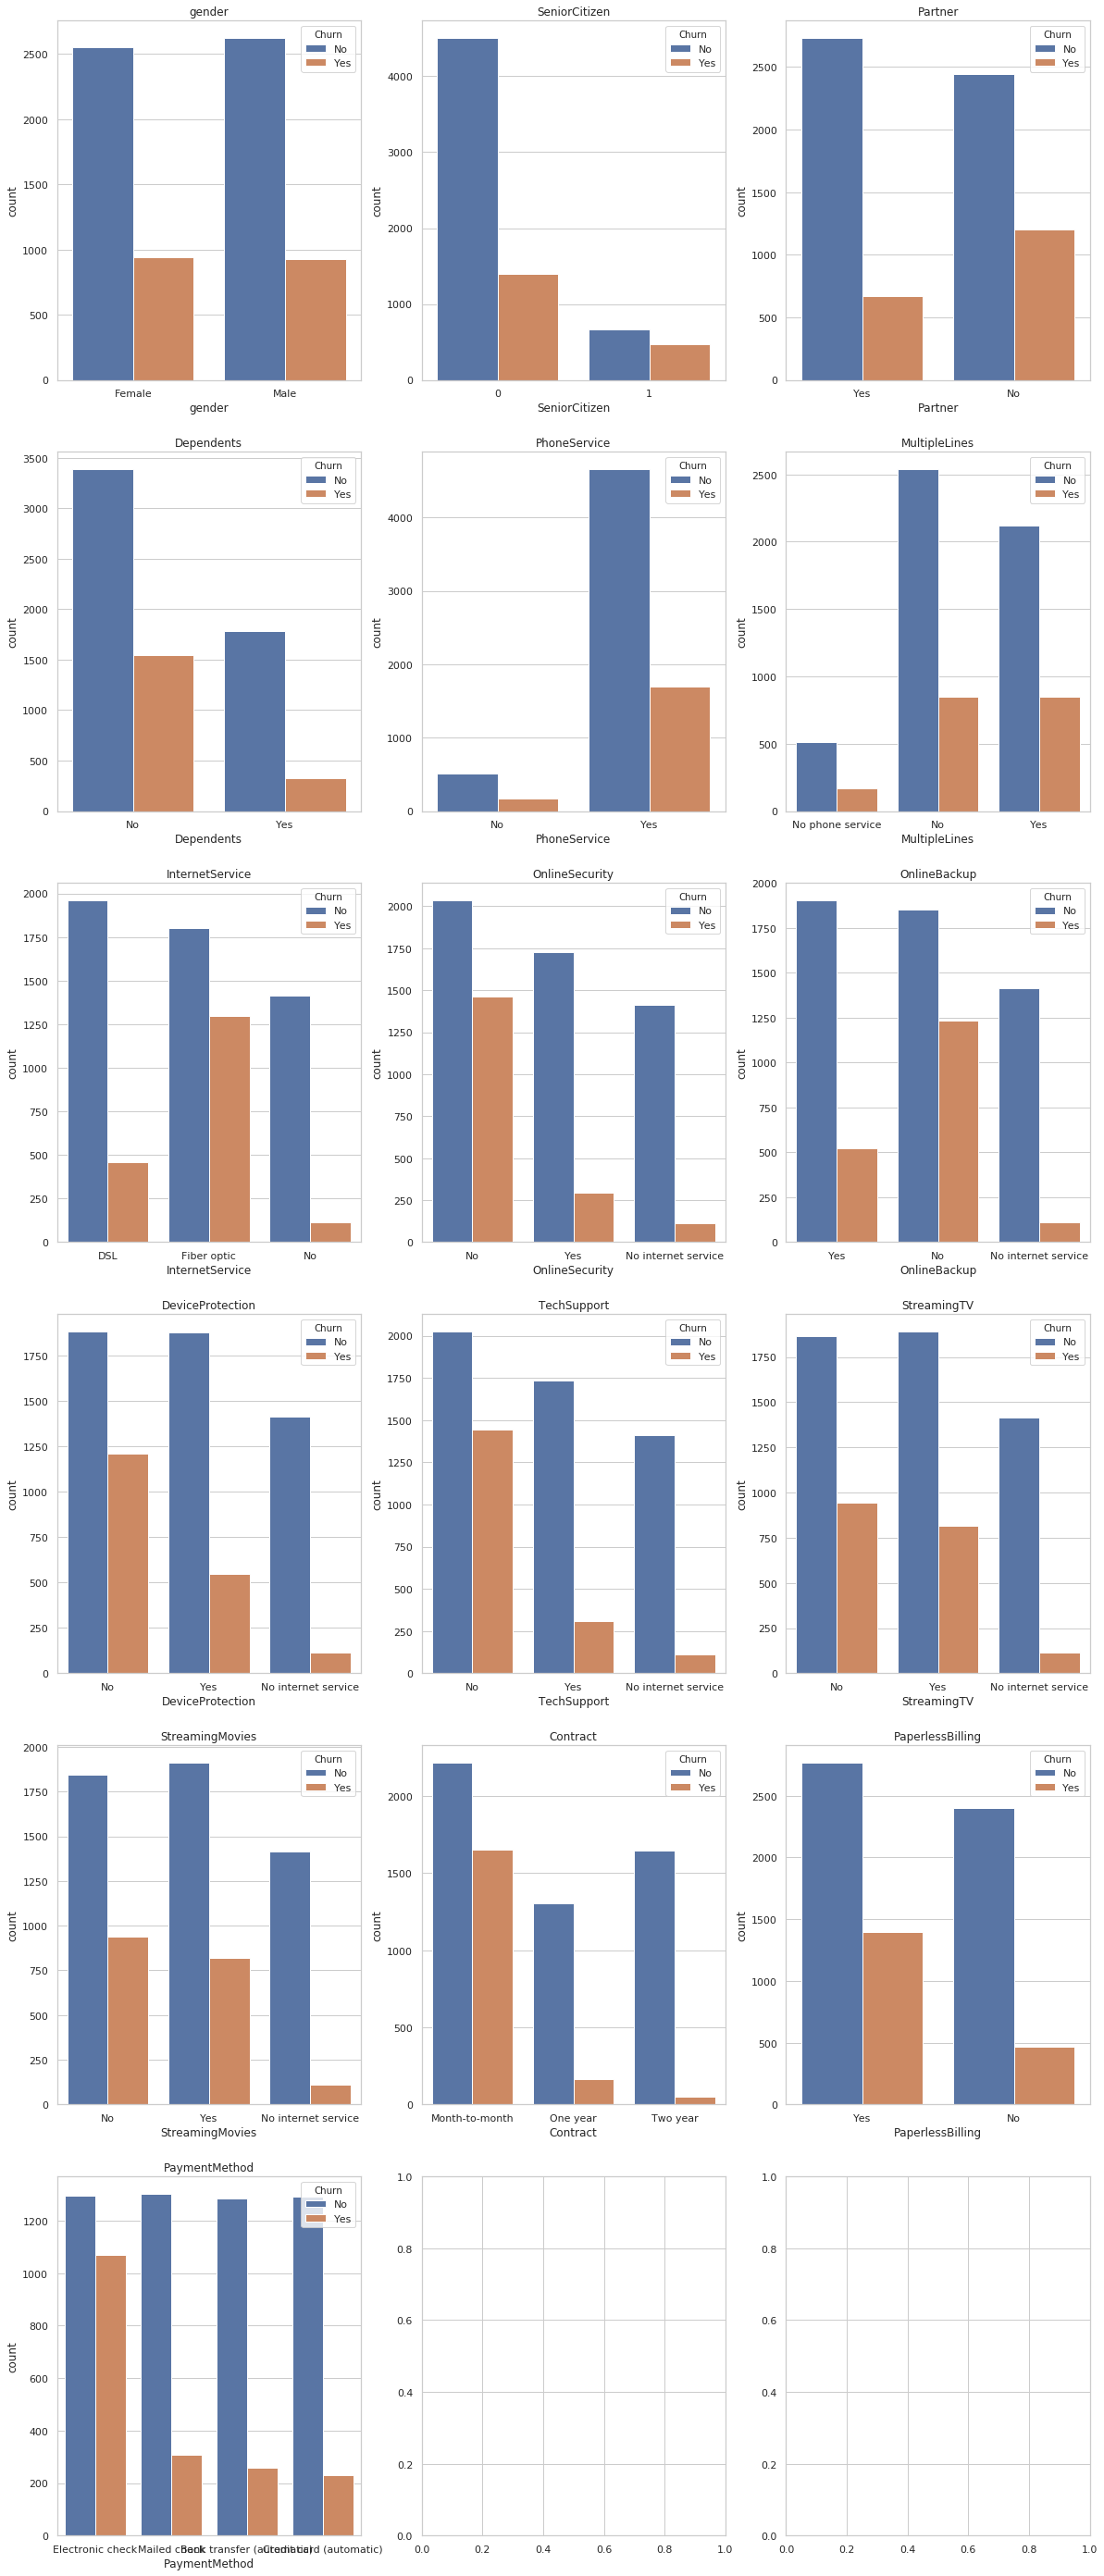

In [7]:
#visualize categorical data as a relation to churn 
fig , axes = plt.subplots(nrows = 6 ,ncols = 3,figsize = (20,50))
for i, col in enumerate(category_cols):
    if i < 3:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[0,i],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[0,i])
    elif i >=3 and i < 6:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[1,i-3],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[1,i-3])
    elif i >= 6 and i < 9:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[2,i-6],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[2,i-6])
    elif i < 12:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[3,i-9],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[3,i-9])
    elif i < 15:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[4,i-12],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[4,i-12])
    elif i < 18:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[5,i-15],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[5,i-15])
    ax.set_title(col)
   

In [8]:
# map  'No internet service' to No 
internet_dependent_service = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in internet_dependent_service : 
    churn_df[i]  = churn_df[i].replace({'No internet service' : 'No'})
    
churn_df['MultipleLines'] = churn_df['MultipleLines'].replace({'No phone service' : 'No'})

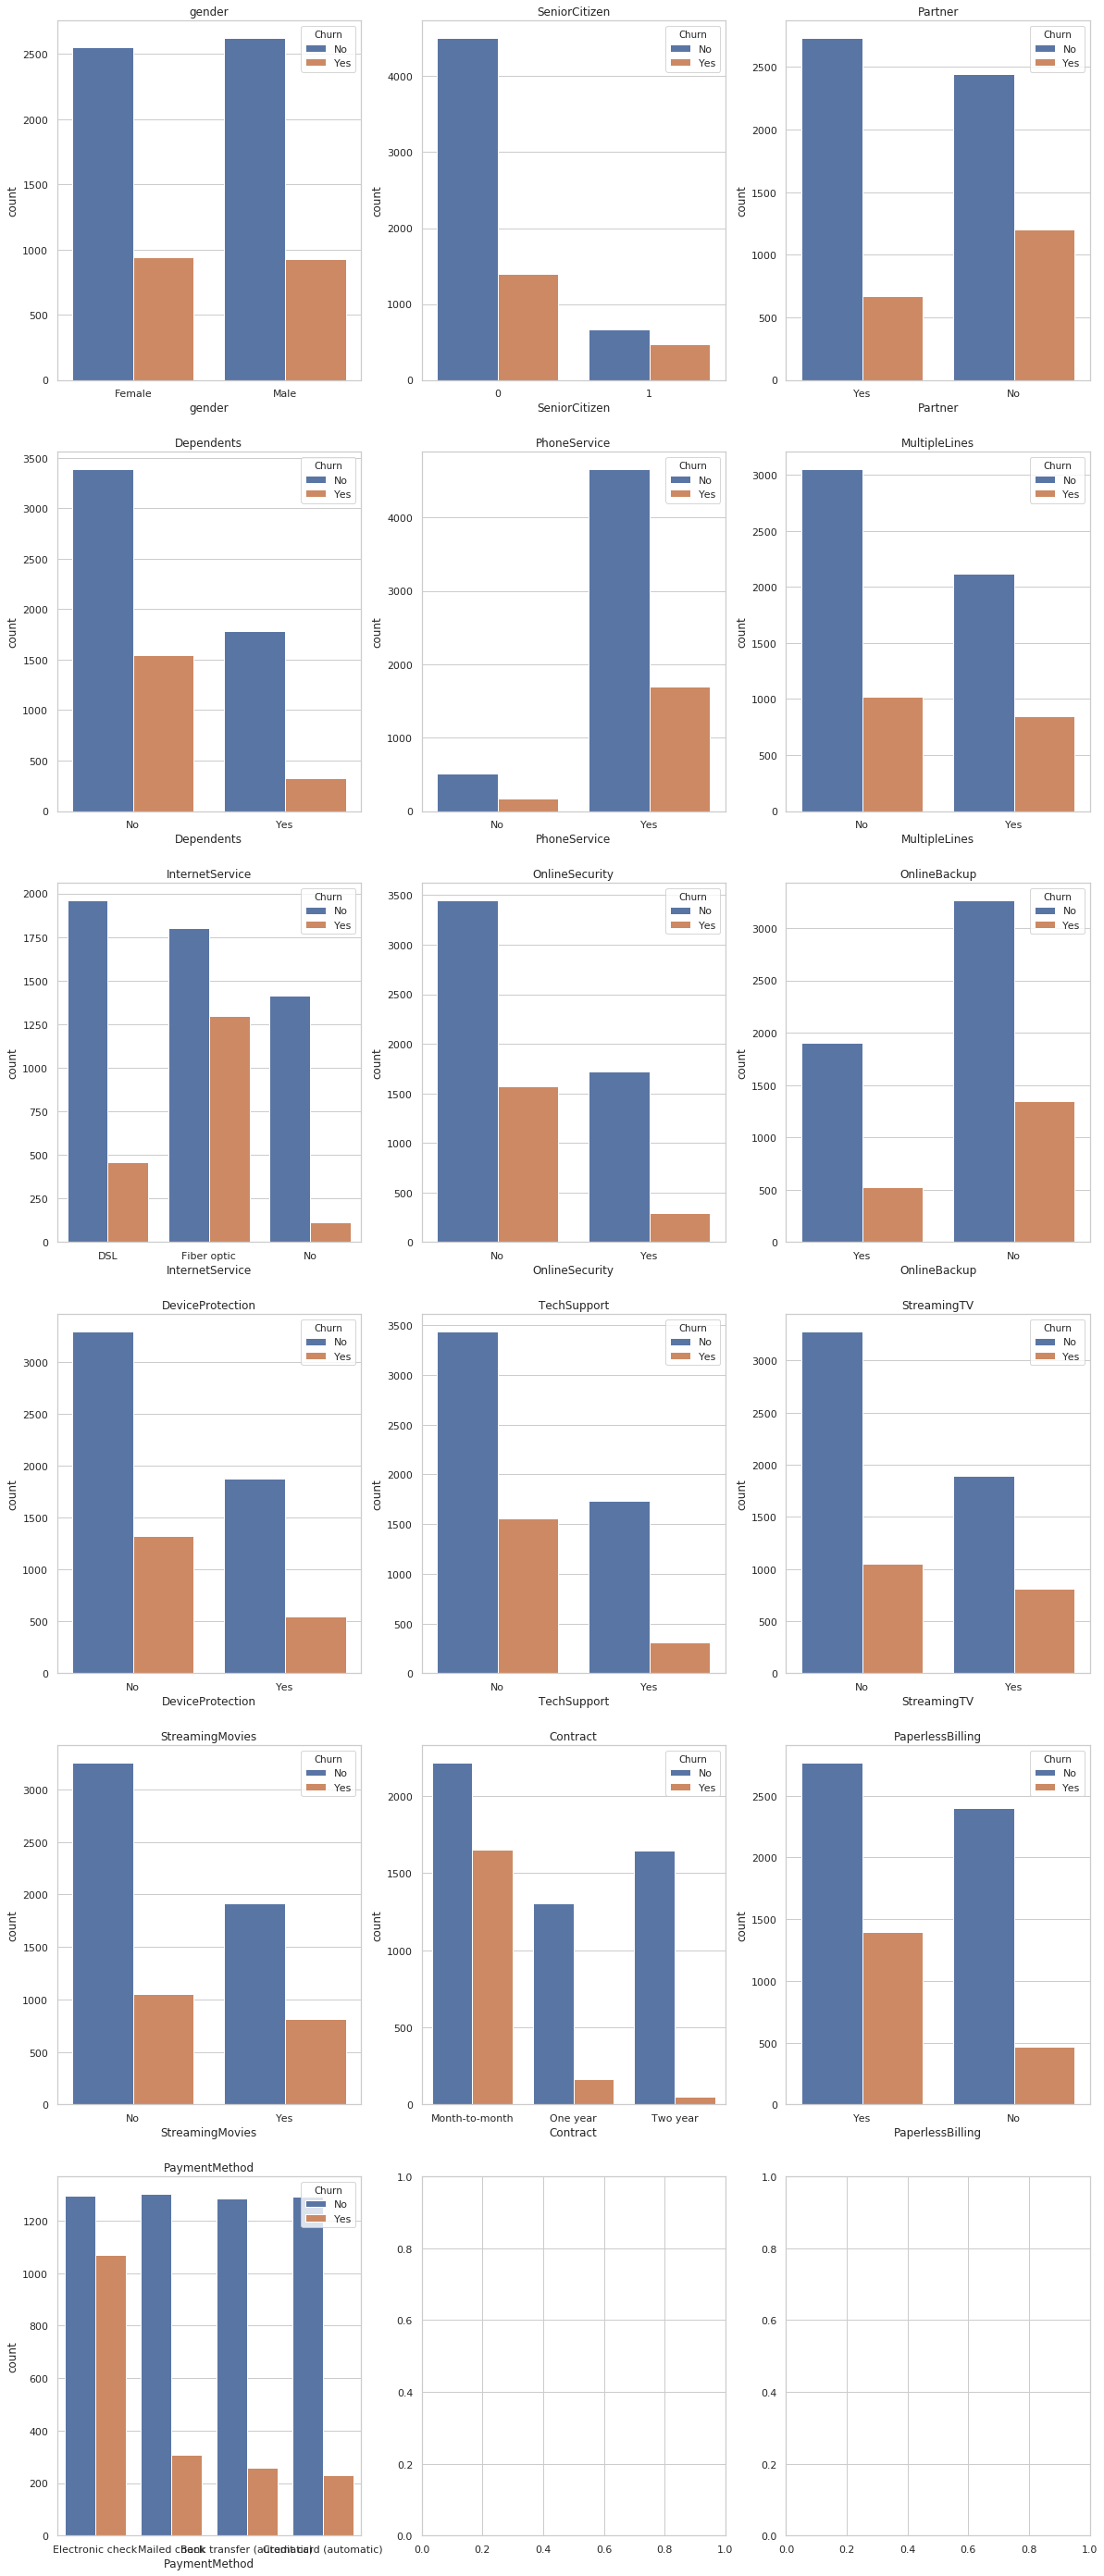

In [9]:
#visualize categorical data as a relation to churn 
fig , axes = plt.subplots(nrows = 6 ,ncols = 3,figsize = (20,50))
for i, col in enumerate(category_cols):
    if i < 3:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[0,i],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[0,i])
    elif i >=3 and i < 6:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[1,i-3],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[1,i-3])
    elif i >= 6 and i < 9:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[2,i-6],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[2,i-6])
    elif i < 12:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[3,i-9],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[3,i-9])
    elif i < 15:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[4,i-12],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[4,i-12])
    elif i < 18:
        #ax = churn_df[item].value_counts().plot(kind = 'bar',ax=axes[5,i-15],rot = 0)
        ax = sns.countplot(x=col ,  hue = churn_df['Churn']  , data=churn_df , ax=axes[5,i-15])
    ax.set_title(col)
   

In [10]:
#quantative description for categorical data as a relation to churn
pd.crosstab(churn_df['Churn'] , churn_df[col] , margins = True)
for col in category_cols: 
    a =  pd.crosstab(churn_df['Churn'] , churn_df[col] , margins = True)
    a = a.apply(lambda r: r/r.sum() * 100 , axis=1)
    print(a)
    print('-----------------------------------------------------------------------------')


gender     Female       Male   All
Churn                             
No      24.632779  25.367221  50.0
Yes     25.120385  24.879615  50.0
All     24.762175  25.237825  50.0
-----------------------------------------------------------------------------
SeniorCitizen          0          1   All
Churn                                    
No             43.563974   6.436026  50.0
Yes            37.265918  12.734082  50.0
All            41.892659   8.107341  50.0
-----------------------------------------------------------------------------
Partner         No        Yes   All
Churn                              
No       23.589099  26.410901  50.0
Yes      32.102729  17.897271  50.0
All      25.848360  24.151640  50.0
-----------------------------------------------------------------------------
Dependents         No        Yes   All
Churn                                 
No          32.759954  17.240046  50.0
Yes         41.278759   8.721241  50.0
All         35.020588  14.979412  50.0
------

/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


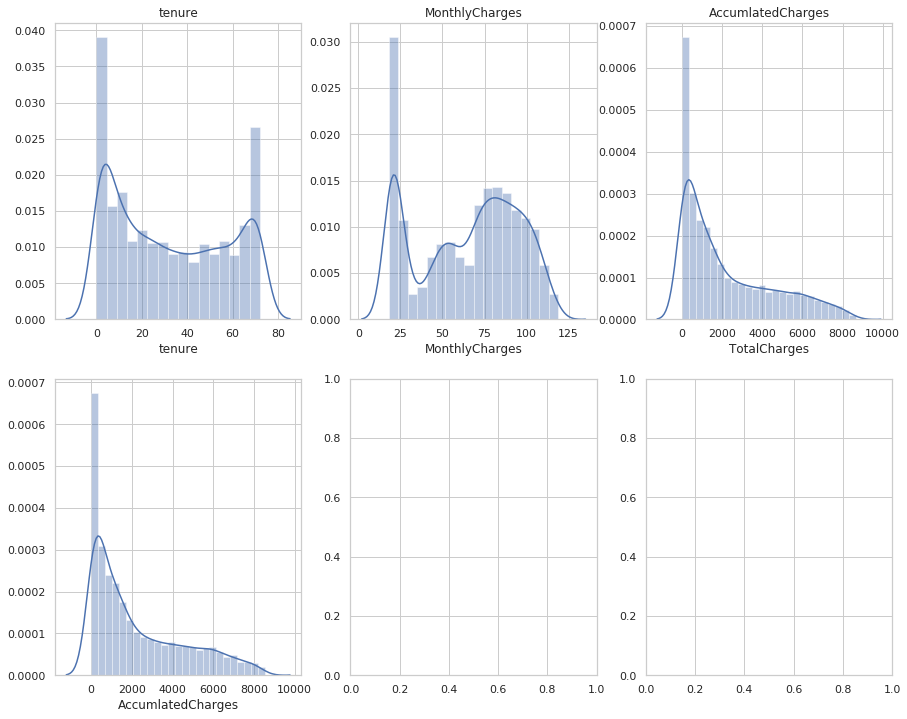

In [11]:
#impute total charge missing value
churn_df['TotalCharges'] = churn_df["TotalCharges"].replace(" ",np.nan)
churn_df["TotalCharges"] = churn_df["TotalCharges"].fillna( churn_df["MonthlyCharges"] * churn_df["tenure"] )
churn_df["TotalCharges"] = churn_df["TotalCharges"].astype(float) 
churn_df["AccumlatedCharges"] = churn_df["MonthlyCharges"] * churn_df["tenure"];

# visualize numeric variables
fig , axes = plt.subplots(nrows = 2 ,ncols = 3,figsize = (15,12))
for i, col in enumerate(numeric_cols):
    ax = sns.distplot(churn_df[col] , ax=axes[0,i])
    ax.set_title(col)

sns.distplot(churn_df['AccumlatedCharges'] , ax=axes[1,0])
ax.set_title('AccumlatedCharges');
#total charge = accumlated charge we can visualize the relation via coorelation map


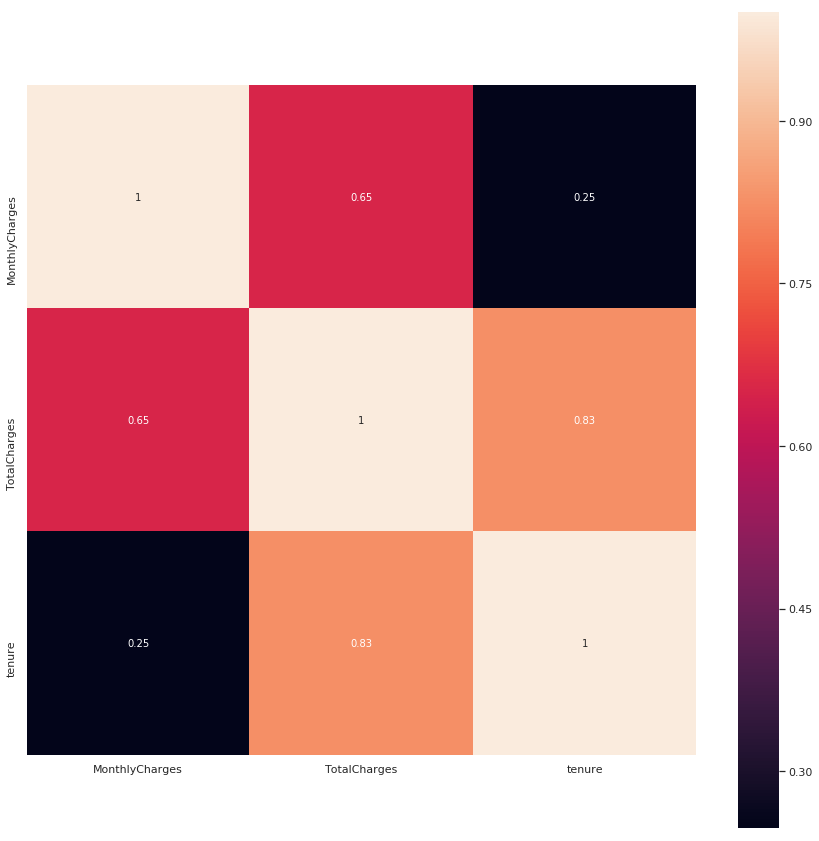

In [12]:
corr_matrix = churn_df[['MonthlyCharges','TotalCharges'  , 'tenure']].corr()
plt.figure(figsize=(15, 15))
corrmap = sns.heatmap( corr_matrix , square=True , annot=True)


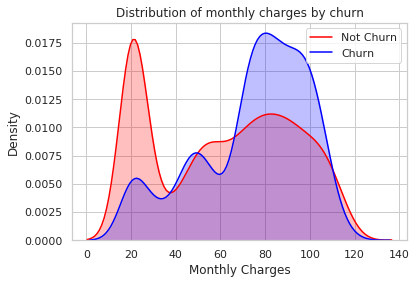

In [13]:
ax = sns.kdeplot(churn_df['MonthlyCharges'][(churn_df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(churn_df['MonthlyCharges'][(churn_df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

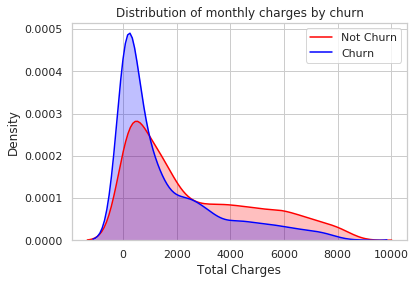

In [14]:
ax = sns.kdeplot(churn_df['TotalCharges'][(churn_df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(churn_df['TotalCharges'][(churn_df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of monthly charges by churn')

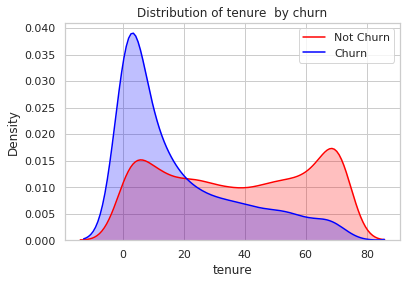

In [15]:
ax = sns.kdeplot(churn_df['tenure'][(churn_df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(churn_df['tenure'][(churn_df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('tenure')
ax.set_title('Distribution of tenure  by churn')

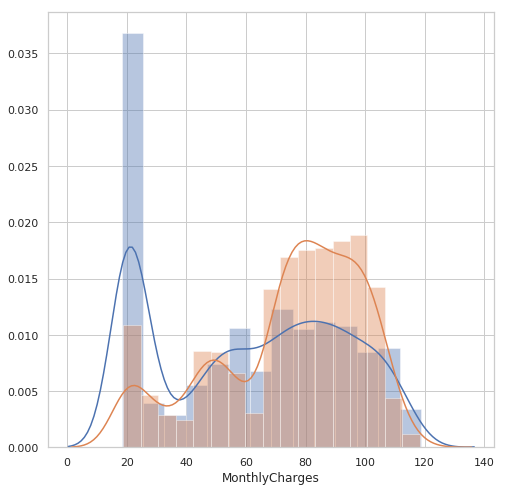

In [16]:
plt.figure(figsize=(8,8))
sns.distplot(churn_df.loc[churn_df['Churn']=='No', 'MonthlyCharges'], label='Churn: No')
sns.distplot(churn_df.loc[churn_df['Churn']=='Yes', 'MonthlyCharges'], label='Churn: Yes')

In [17]:
# PCA 
# Separating out the numeric features
x_numeric = churn_df.loc[:,numeric_cols].values


In [18]:
# Standardizing the features
x_normalized = StandardScaler().fit_transform(x_numeric)

In [19]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_normalized)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, churn_df[target_col]], axis = 1)

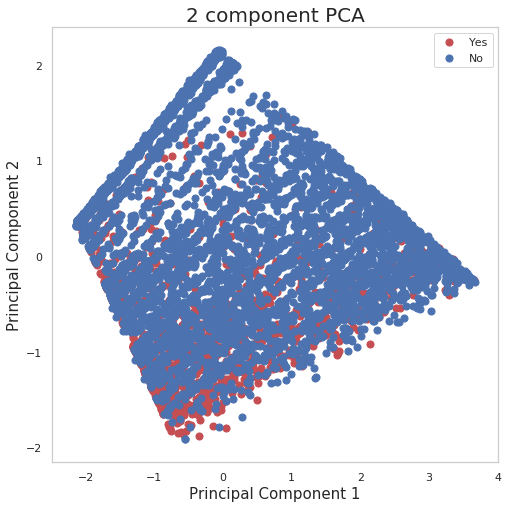

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Yes', 'No']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Churn'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [21]:
#Binary columns with 2 values
binary_cols   = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_category_cols = [i for i in category_cols if i not in binary_cols]



#Label encoding Binary columns
le = LabelEncoder()
for i in binary_cols :
    churn_df[i] = le.fit_transform(churn_df[i])
    
#Duplicating columns for multi value columns
churn_df = pd.get_dummies(data = churn_df,columns = multi_category_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(churn_df[numeric_cols])
scaled = pd.DataFrame(scaled,columns=numeric_cols)

In [22]:
list(churn_df)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'AccumlatedCharges',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [23]:
#splitting train and test data 
train,test = train_test_split(churn_df,test_size = .25 ,random_state = 111)
 
#based on previous analysis via visualiztion and mathematical analysis we can deduce the relevant features and test it 
features = ['tenure' , 'MonthlyCharges' , 'SeniorCitizen' , 'Partner' , 'Dependents' ,
             'OnlineSecurity',
             'OnlineBackup',
             'DeviceProtection',
             'TechSupport',
             'StreamingTV',
             'StreamingMovies',
             'PaperlessBilling',
             'InternetService_DSL',
             'InternetService_Fiber optic',
             'InternetService_No',
             'Contract_Month-to-month',
             'Contract_One year',
             'Contract_Two year',
             'PaymentMethod_Bank transfer (automatic)',
             'PaymentMethod_Credit card (automatic)',
             'PaymentMethod_Electronic check',
             'PaymentMethod_Mailed check']
target = ['Churn']

train_X = train[features]
train_Y = train['Churn']
test_X  = test[features]
test_Y  = test['Churn']

In [24]:
def churn_prediction(ml_model,train_x,train_y,test_x,test_y) :
                            
    #model
    ml_model.fit(train_x,train_y)
    predictions   = ml_model.predict(test_x)
    scores = cross_val_score(ml_model , train_x , train_y , cv=5)
    
    print (ml_model)
    print("Cross-validation scores: {}".format(scores))
    print("Average cross-validation score: {:.2f}".format(scores.mean()))
    print ("Classification report :",classification_report(test_y,predictions))
    print ("Accuracy Score : ",accuracy_score(test_y,predictions))
   

In [25]:
logistic_regression_model = LogisticRegression()
churn_prediction(logistic_regression_model,train_X,train_Y,test_X,test_Y)

/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Cross-validation scores: [0.79091769 0.79943236 0.8030303  0.80208333 0.78882576]
Average cross-validation score: 0.80
Classification report :               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1327
           1       0.61      0.56      0.58       434

    accuracy                           0.80      1761
   macro avg       0.73      0.72      0.73      1761
weighted avg       0.80      0.80      0.80      1761

Accuracy Score :  0.8023850085178875


/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/apps/anaconda2/envs/jupyter-py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
decision_tree_model = DecisionTreeClassifier()
churn_prediction(decision_tree_model,train_X,train_Y,test_X,test_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Cross-validation scores: [0.72280038 0.73415326 0.71875    0.69602273 0.70738636]
Average cross-validation score: 0.72
Classification report :               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1327
           1       0.47      0.55      0.51       434

    accuracy                           0.74      1761
   macro avg       0.66      0.67      0.66      1761
weighted avg       0.75      0.74      0.74      1761

Accuracy Score :  0.7353776263486655
